<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/Deep_NLP(09_07_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer= nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp=spacy.load("en_core_web_sm")

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold , cross_val_score

from sklearn.decomposition import TruncatedSVD

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from operator import imod
import xgboost as xgb

import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Embedding ,LSTM
from tensorflow.keras.utils import to_categorical

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


In [ ]:
from datetime import datetime
import time
import re
from collections import Counter
import string
import scipy.sparse


In [ ]:
from textblob import TextBlob

In [ ]:
!pip install pyLDAvis
from gensim import corpora
from gensim.models import LdaMulticore
import pyLDAvis.gensim
from gensim.models import CoherenceModel

import pickle
import warnings
warnings.filterwarnings("ignore")
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from IPython .display import clear_output
clear_output()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Datasets/GrammarandProductReviews (1).csv')

In [ ]:
print("SHape" , df.shape)

SHape (71044, 25)


In [ ]:
print("columns :" , df.columns)


columns : Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')


Rename


In [ ]:
col_names=df.columns
new_col_names=[i.replace("." ,"_") for i in col_names]
df.columns=new_col_names
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'upc'],
      dtype='object')

In [ ]:
print("Data types :" , df.dtypes)

Data types : id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews_date             object
reviews_dateAdded        object
reviews_dateSeen         object
reviews_didPurchase      object
reviews_doRecommend      object
reviews_id              float64
reviews_numHelpful      float64
reviews_rating            int64
reviews_sourceURLs       object
reviews_text             object
reviews_title            object
reviews_userCity         object
reviews_userProvince     object
reviews_username         object
upc                      object
dtype: object


In [ ]:
print("Info " , df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews_date          70977 non-null  object 
 11  reviews_dateAdded     71044 non-null  object 
 12  reviews_dateSeen      71044 non-null  object 
 13  reviews_didPurchase   32158 non-null  object 
 14  reviews_doRecommend   60429 non-null  object 
 15  reviews_id         

In [ ]:
print("Missing value count" )
print((df.isnull().sum()/df.shape[0] )*100)

Missing value count
id                       0.000000
brand                    0.000000
categories               0.000000
dateAdded                0.000000
dateUpdated              0.000000
ean                     45.012950
keys                     0.000000
manufacturer             0.198469
manufacturerNumber       0.285738
name                     0.000000
reviews_date             0.094308
reviews_dateAdded        0.000000
reviews_dateSeen         0.000000
reviews_didPurchase     54.735094
reviews_doRecommend     14.941445
reviews_id              54.735094
reviews_numHelpful      54.242441
reviews_rating           0.000000
reviews_sourceURLs       0.000000
reviews_text             0.050673
reviews_title            0.671415
reviews_userCity        92.385001
reviews_userProvince    99.367997
reviews_username         0.143573
upc                      0.002815
dtype: float64


In [ ]:
df.isna().sum().sum()


296159

In [ ]:
df.shape

(71044, 25)

<Axes: >

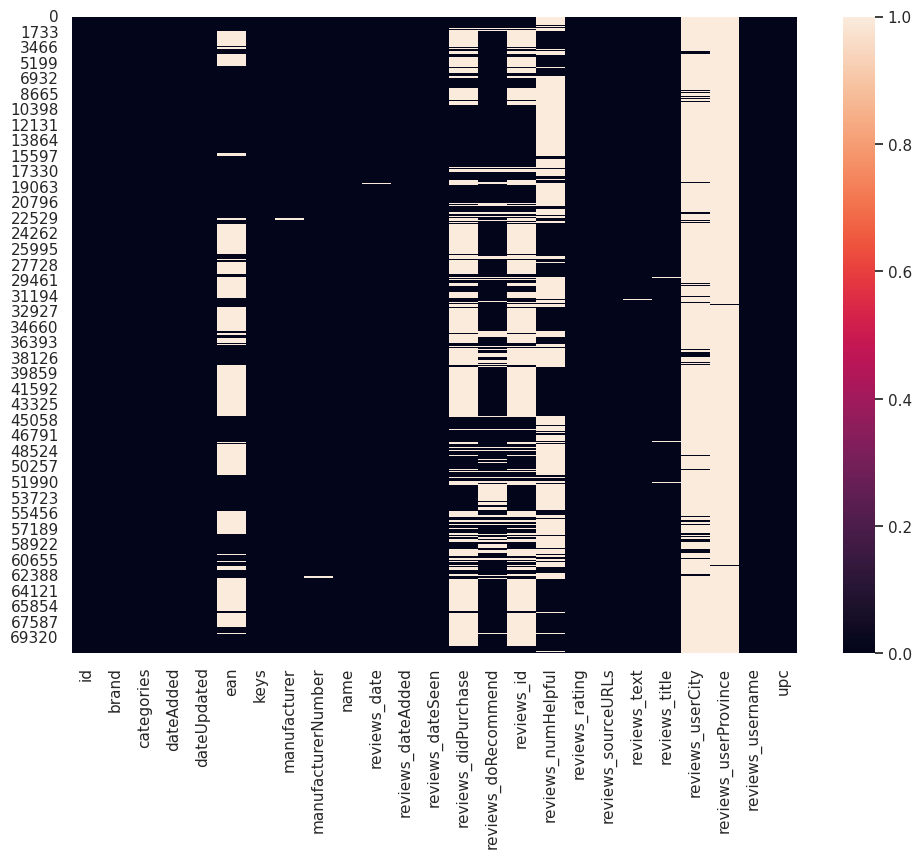

In [ ]:
sns.set(rc={'figure.figsize':(11.7 , 8.27)})
sns.heatmap(data=df.isnull())

In [ ]:
print("Total missing value Count:" , df.isnull().sum().values.sum())

Total missing value Count: 296159


In [ ]:
missing_val_threshold =len(df) *.2
df.dropna(thresh=missing_val_threshold , axis=1 , inplace=True)

In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews_date',
       'reviews_dateAdded', 'reviews_dateSeen', 'reviews_didPurchase',
       'reviews_doRecommend', 'reviews_id', 'reviews_numHelpful',
       'reviews_rating', 'reviews_sourceURLs', 'reviews_text', 'reviews_title',
       'reviews_username', 'upc'],
      dtype='object')

In [ ]:
df.shape

(71044, 23)

In [ ]:
df.dropna(subset=['reviews_text' , 'reviews_date'] , inplace=True)

In [ ]:
df.shape

(70941, 23)

In [ ]:
print("Percentage of missing values :")
print(df.isna().mean().round(4)*100)

Percentage of missing values :
id                      0.00
brand                   0.00
categories              0.00
dateAdded               0.00
dateUpdated             0.00
ean                    45.07
keys                    0.00
manufacturer            0.20
manufacturerNumber      0.28
name                    0.00
reviews_date            0.00
reviews_dateAdded       0.00
reviews_dateSeen        0.00
reviews_didPurchase    54.67
reviews_doRecommend    14.82
reviews_id             54.67
reviews_numHelpful     54.18
reviews_rating          0.00
reviews_sourceURLs      0.00
reviews_text            0.00
reviews_title           0.66
reviews_username        0.13
upc                     0.00
dtype: float64


In [ ]:
df.shape

(70941, 23)

In [ ]:
df['Review']=df['reviews_title'].map(str)+ " "+df['reviews_text']

In [ ]:
df['Review']=df['Review'].apply(lambda x: x.lower())

In [ ]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [ ]:
df['Review']=df['Review'].str.replace('[^\w\s]' ,'')

In [ ]:
df['Review'][0]

"just awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

Remove stopwords

In [ ]:
stop=stopwords.words('english')
df['Review']=df['Review'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
df['Review'][0]

'awesome love album. good. hip hop side current pop sound.. hype! listen everyday gym! give 5star rating way. metaphors crazy.'

In [ ]:
def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN # Changed from wordnet to wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None # Added a default return

In [ ]:
def lemmatize_sentence(sentence):
  nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatize_sentence=[]
  for word , tag in wordnet_tagged:
    if tag is None:
      lemmatize_sentence.append(word)
    else:
      lemmatize_sentence.append(lemmatizer.lemmatize(word , pos=tag))
  return " ".join(lemmatize_sentence)

In [ ]:
df['Review']=df['Review'].apply(lambda x : lemmatize_sentence(x))

In [ ]:
df['Review'][0]

'awesome love album . good . hip hop side current pop sound .. hype ! listen everyday gym ! give 5star rating way . metaphor crazy .'

In [ ]:
# df.to_csv('/content/drive/My Drive/Updated_GrammarandProductReviews.csv')

In [ ]:
def scrub_words(text):
  text=re.sub("(<.*?>)","" ,text)
  text=re.sub("(\\W|\\d)"," " , text)
  text=text.strip()
  return text



In [ ]:
df['Review']=df['Review'].apply(lambda x: scrub_words(x))

In [ ]:
df['Review'][0]

'awesome love album   good   hip hop side current pop sound    hype   listen everyday gym   give  star rating way   metaphor crazy'

In [ ]:
df['Review_WC']=df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review_WC' , 'Review']].head(3)

,Review_WC,Review
0,34,awesome love album good hip hop side curre...
1,9,good good flavor review collect part promotion
2,3,good good flavor


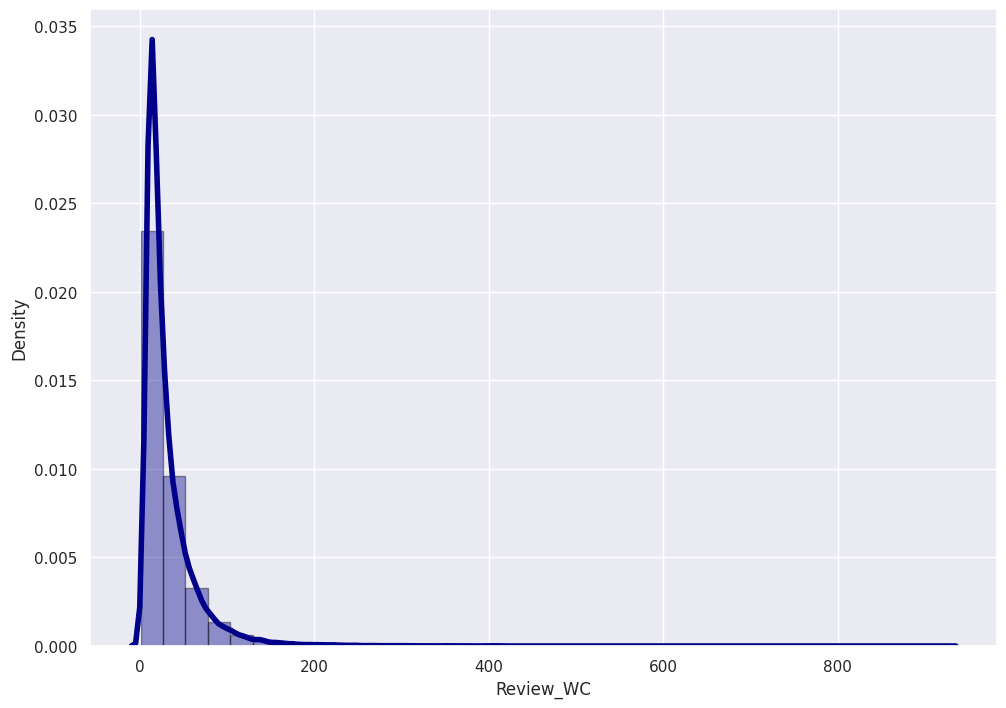

In [ ]:
sns.distplot(df['Review_WC'], hist=True, kde=True,
             bins=int(180/5), color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [ ]:
def avg_word(sentence ):
  words=sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['Review_AWL']=df['Review'].apply(lambda x :avg_word(x))
df[['Review_AWL' , 'Review']].head(3)

,Review_AWL,Review
0,4.800000,awesome love album good hip hop side curre...
1,5.714286,good good flavor review collect part promotion
2,4.666667,good good flavor


<Axes: xlabel='Review_AWL', ylabel='Density'>

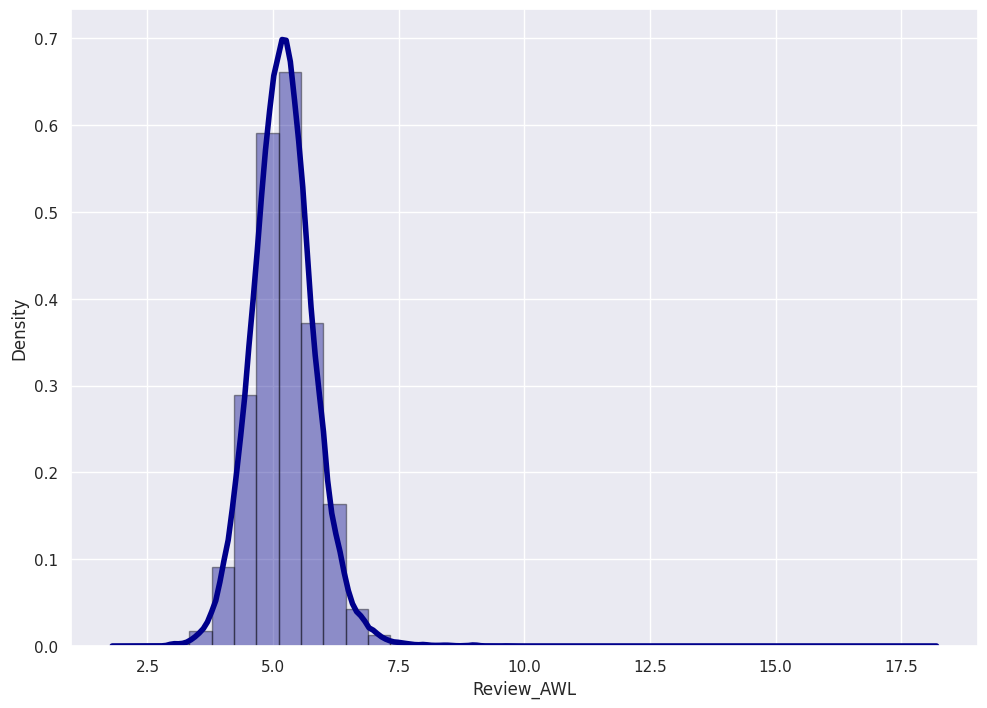

In [ ]:
sns.distplot(df['Review_AWL'] , hist=True  , kde=True ,
             bins=int(180/5) , color ='darkblue' ,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

In [ ]:
def freq_words(x , terms=30):
  all_words=' '.join([text for text  in x ])
  all_words=all_words.split()
  fdist=FreqDist(all_words)
  words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d=words_df.nlargest(columns='count' , n=terms)
  plt.figure(figsize=(20 , 10))
  ax=sns.barplot(data=d , x='count' , y='word')
  ax.set(ylabel ='word')
  plt.show()

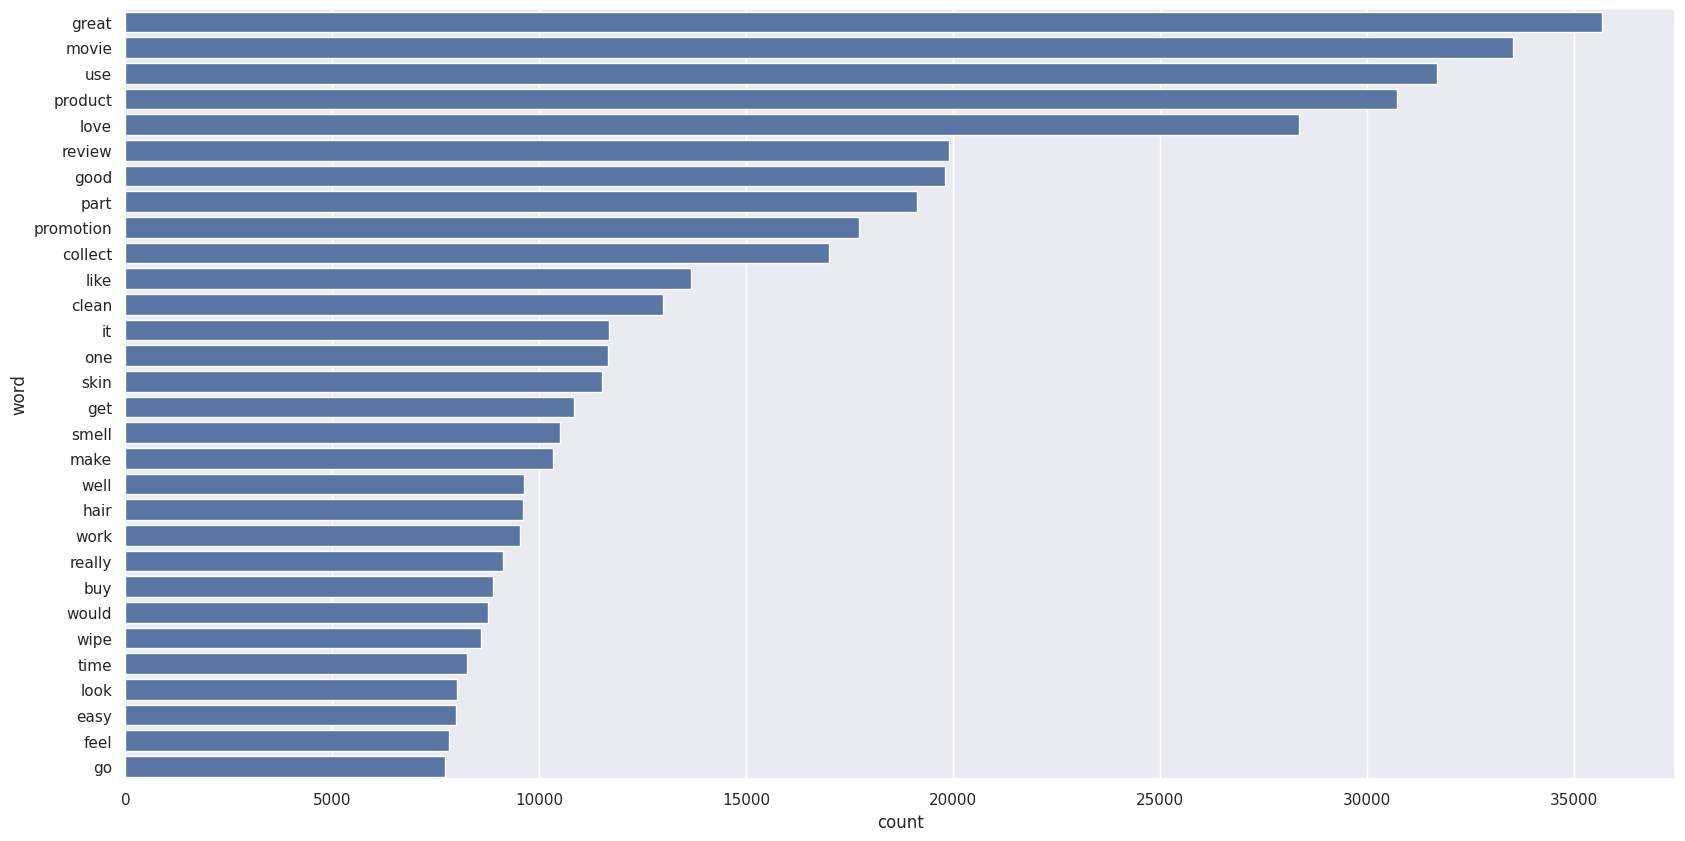

In [ ]:
freq_words(df['Review'])

In [ ]:
def freq_words(x , terms=30):
  all_words=' '.join([text for text  in x ])
  all_words=all_words.split()
  fdist=FreqDist(all_words)
  words_df=pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d=words_df.nlargest(columns='count' , n=terms)
  plt.figure(figsize=(20 , 10))
  ax=sns.barplot(data=d , x='count' , y='word')
  ax.set(ylabel ='word')
  plt.show()

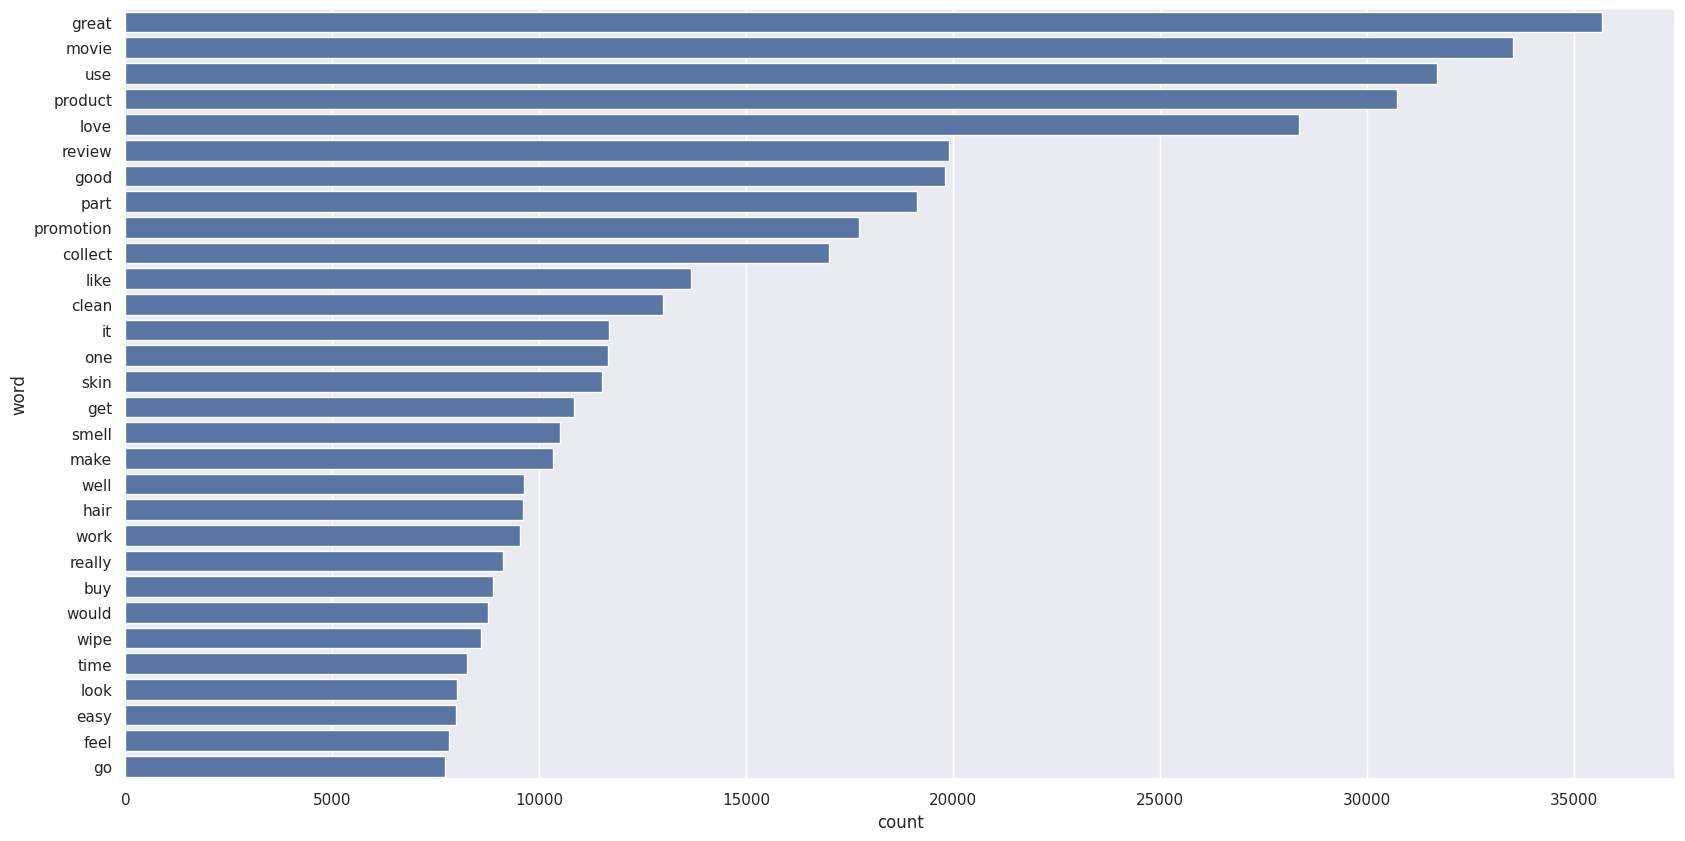

In [ ]:
freq_words(df['Review'])